In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

| Feature | Values |
| --- | --- |
| Gender | 0: Female, 1: Male |
| SeniorCitizen | 0: age <= 65, 1: age > 65 |
| Partner | 0: No, 1: Yes |
| Dependents | 0: No, 1: Yes |
| PhoneService | 0: No, 1: Yes |
| MultipleLines | 0: No, 1: Yes, 2: No phone service |
| InternetService | 0: No, 1: DSL, 2: Fiber optic |
| Other Services | 0: No, 1: No internet service, 2: Yes |
| PaperlessBilling | 0: No, 1: Yes |
| PaymentMethod | 0: Bank transfer, 1: Credit card, 2: E-check, 3: Check |

# Load dataset

In [2]:
df_telco = pd.read_csv('data/telco_customer_churn.csv', header=0)

# Identify categorical and numeric columns

In [3]:
df_telco.drop(columns=['CustomerID'], inplace=True)

In [4]:
# df_telco.nunique()

In [5]:
set(df_telco['PaymentMethod'])

{'Bank transfer (automatic)',
 'Credit card (automatic)',
 'Electronic check',
 'Mailed check'}

In [6]:
# Store categorical column names
categorical = df_telco.nunique()[df_telco.nunique() < 5].keys().tolist()
categorical.remove('Churn')
print(categorical)

['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [7]:
# Store numerical column names
numerical = [x for x in df_telco.columns if x not in categorical]
numerical.remove('Churn')
print(numerical)

['Tenure', 'MonthlyCharges', 'TotalCharges']


## One-Hot encoding

In [8]:
df_telco_encoded = pd.get_dummies(data=df_telco, columns=categorical, drop_first=True, dtype=int)

In [9]:
df_telco_encoded.head()

,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


# Correlation Matrix

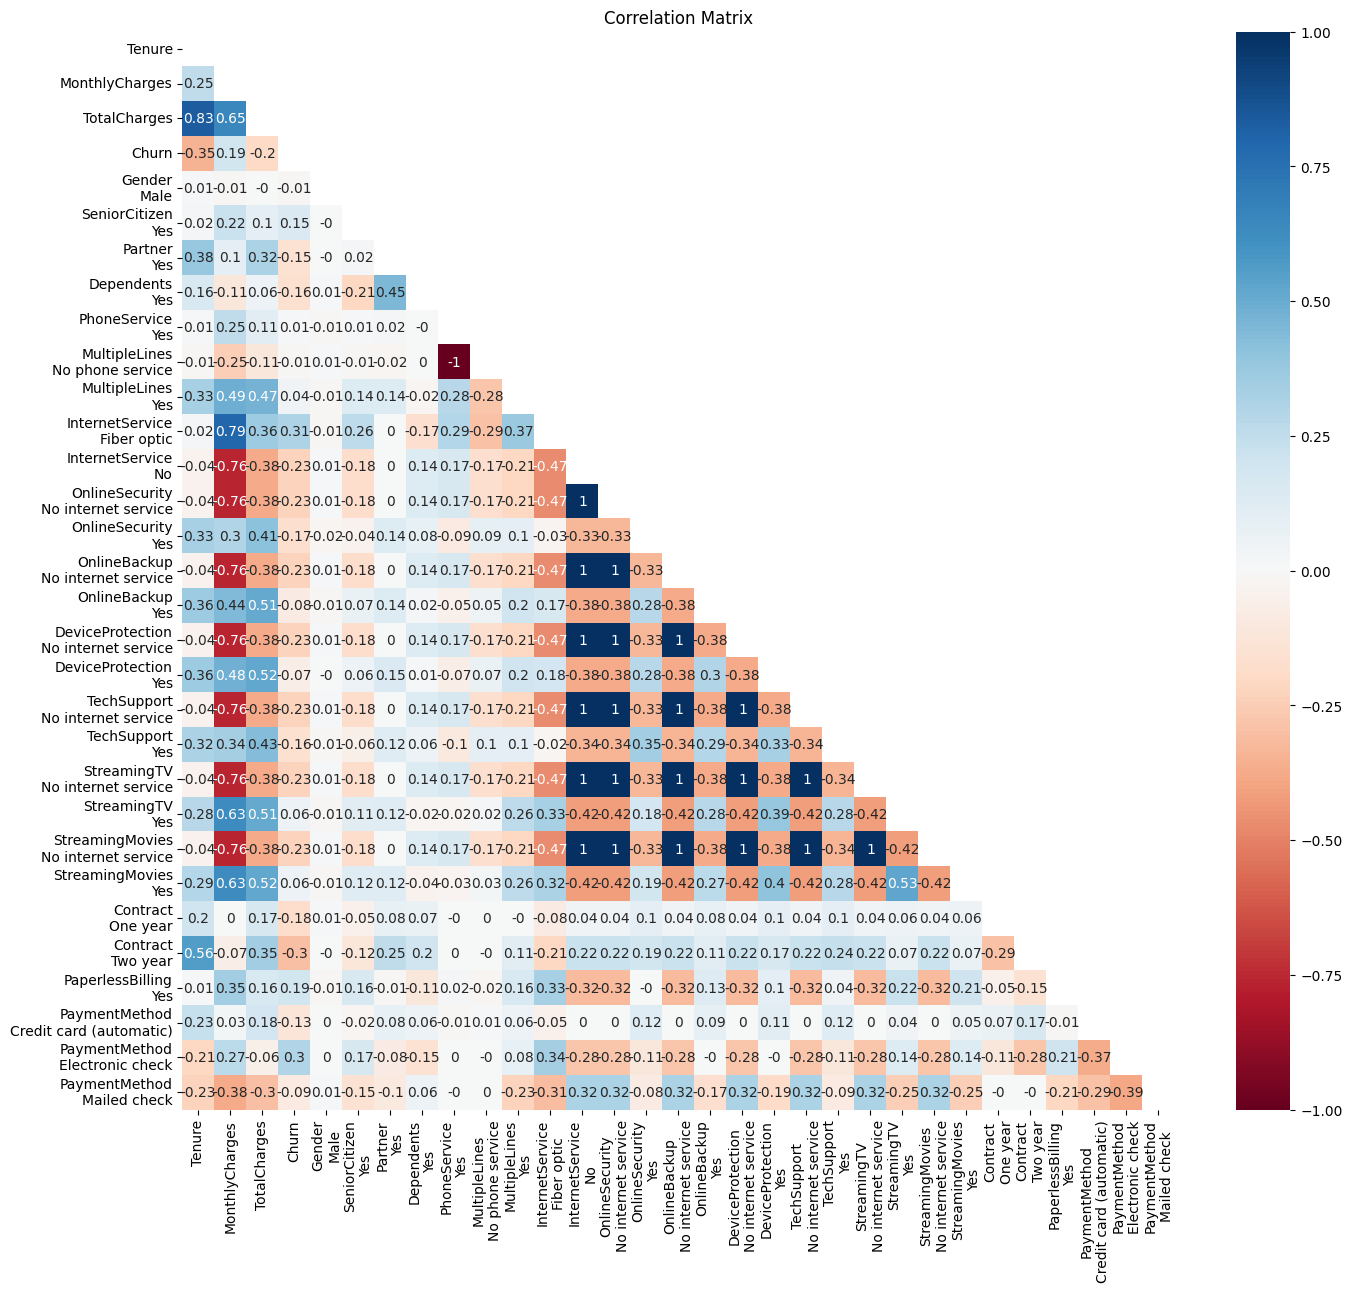

In [10]:
def wrap_axis_labels(ticklabel):
    return [x.get_text().replace('_', '\n') for x in ticklabel]


# Compute the correlation matrix
corr_matrix = df_telco_encoded.corr().round(2)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(16, 14))

# Only plotting the columns where the correlations are very high
s = sns.heatmap(corr_matrix,
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1,
                mask=mask)

s.set_xticklabels(wrap_axis_labels(s.get_xticklabels()), rotation=90)
s.set_yticklabels(wrap_axis_labels(s.get_yticklabels()), rotation=0)

plt.title('Correlation Matrix')
plt.show()

### Remove redundant features

In [11]:
corr_cols = [
    'OnlineSecurity_No internet service',
    'OnlineBackup_No internet service',
    'DeviceProtection_No internet service',
    'TechSupport_No internet service',
    'StreamingTV_No internet service',
    'StreamingMovies_No internet service',
    'MultipleLines_No phone service'
]
df_telco_encoded.drop(columns=corr_cols, inplace=True)
print(df_telco_encoded.columns.tolist())

['Tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Gender_Male', 'SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [12]:
df_telco_encoded.head()

,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
